### Mateusz Kądziela, 148271
### Mateusz Serek, 148284
Source code and more readable pseudocode available [here](https://github.com/MatKadd/EC_2023/tree/main).

In [1]:
import pandas as pd
import time
from prettytable import PrettyTable 
from numpy import mean

from utils import (
    calculate_distances,
    get_solution_length,
    evaluate_solution,
    get_scores,
)

from algorithms import weighted_two_regret, get_random_solution, greedy, steepest
from visualisations import print_stats, visualize_solution, visualize_stats

# Read data and calculate distances

In [2]:
C = pd.read_csv("../data/TSPC.csv", sep=";", header=None)
C.name = "Instance C"

instances = [C]

In [3]:
distances = calculate_distances(C)

# Pseudocode

Greedy

Steepest

# All binary options

In [4]:
start_methods = [get_random_solution, weighted_two_regret]
intra_moves = ['node', 'edge']
search_types = [greedy, steepest]

# Run all methods

In [5]:
def analyze(start_method, intra_move, search_type, distances):
    start_solutions = [start_method(distances, start_node=_) for _ in range(200)]
    final_solutions = []
    for solution in start_solutions:
        while True:
            solution, improvement = search_type(solution, intra_move, distances)
            if improvement == 0:
                break
        final_solutions.append((solution, evaluate_solution(solution, distances)))
    return final_solutions
        
    

For each method, calculate average time, visualize stats and best solution. Each method's name is created from 3 binary options:
 - random or two weight (start method)
 - node or edge (type of intra move used in neighborhood)
 - greedy or steepest (type of search)

Min score for random, node, greedy: 58925
Max score for random, node, greedy: 76661
Avg score for random, node, greedy: 67727.76


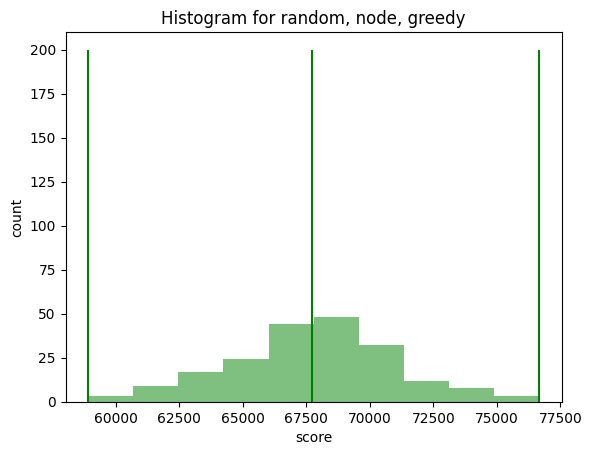

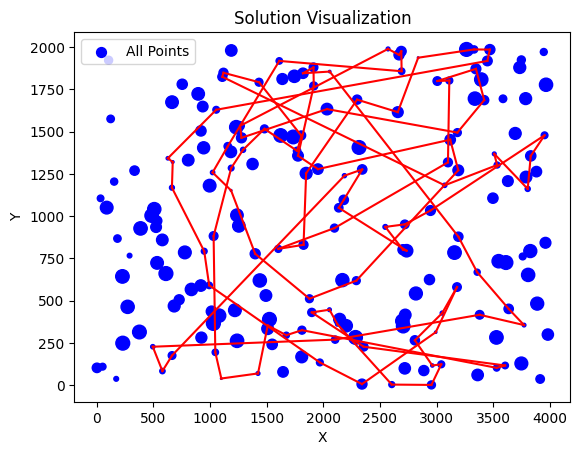

Min score for random, node, steepest: 58228
Max score for random, node, steepest: 73646
Avg score for random, node, steepest: 65882.965


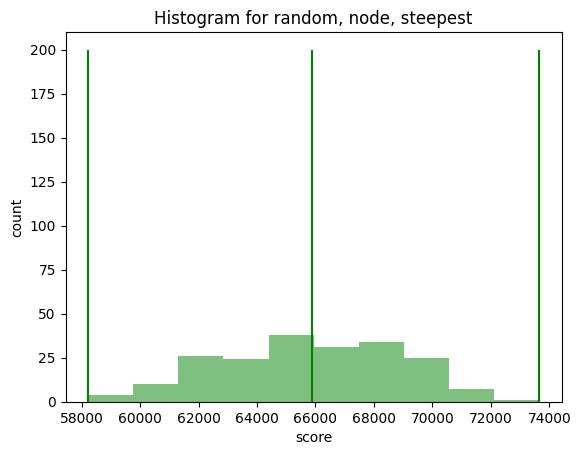

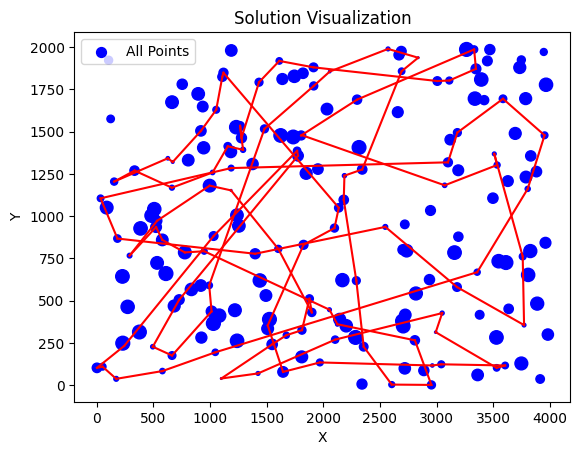

Min score for random, edge, greedy: 54454
Max score for random, edge, greedy: 78084
Avg score for random, edge, greedy: 66723.23


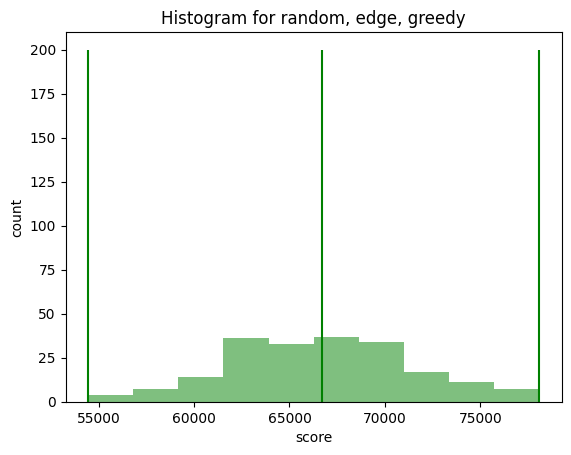

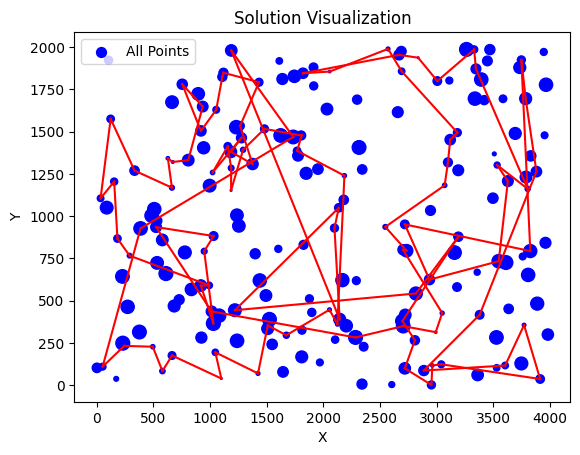

Min score for random, edge, steepest: 52541
Max score for random, edge, steepest: 61560
Avg score for random, edge, steepest: 57059.375


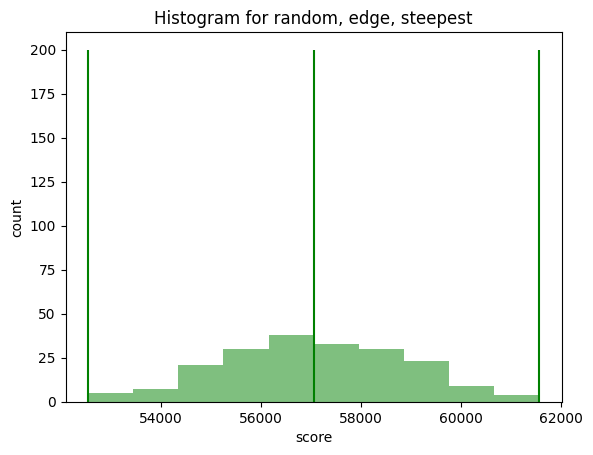

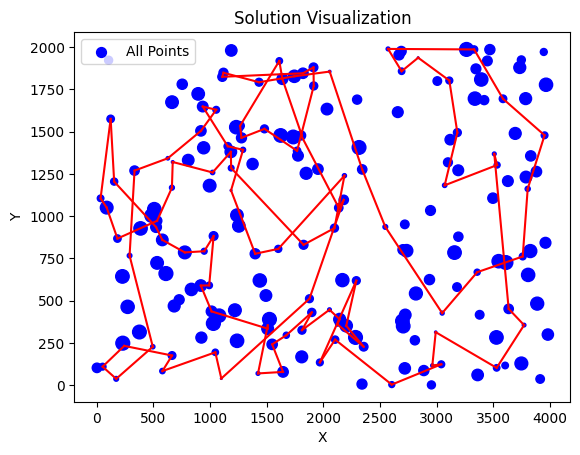

Min score for two_regret, node, greedy: 48904
Max score for two_regret, node, greedy: 51753
Avg score for two_regret, node, greedy: 50253.935


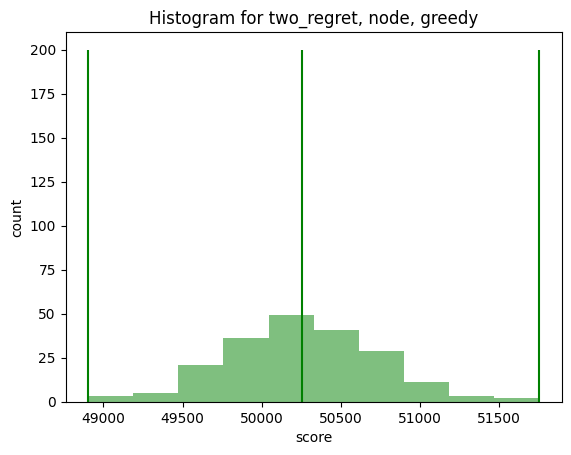

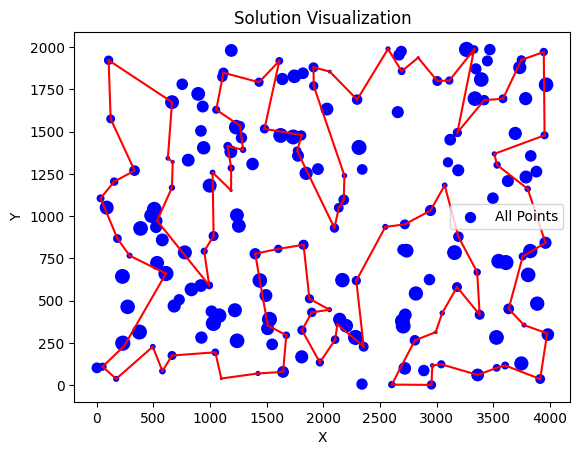

Min score for two_regret, node, steepest: 48619
Max score for two_regret, node, steepest: 50682
Avg score for two_regret, node, steepest: 49809.055


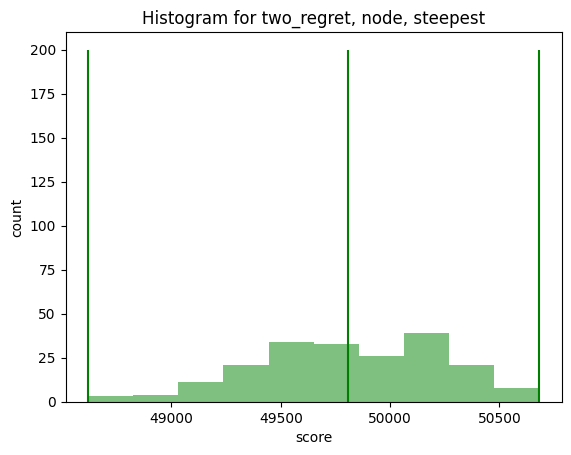

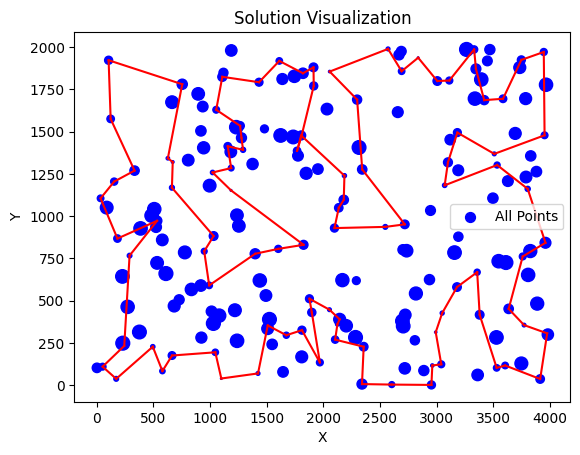

Min score for two_regret, edge, greedy: 49006
Max score for two_regret, edge, greedy: 51753
Avg score for two_regret, edge, greedy: 50289.75


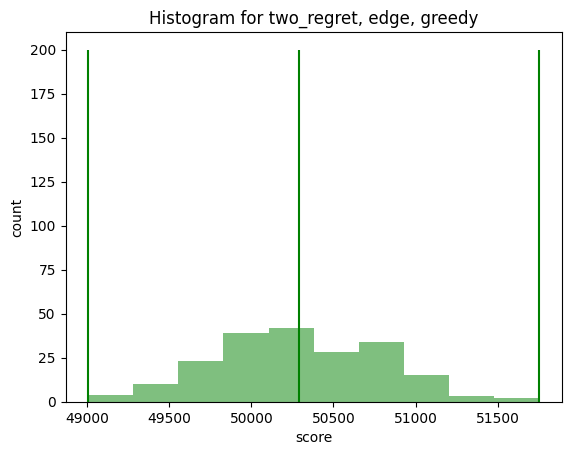

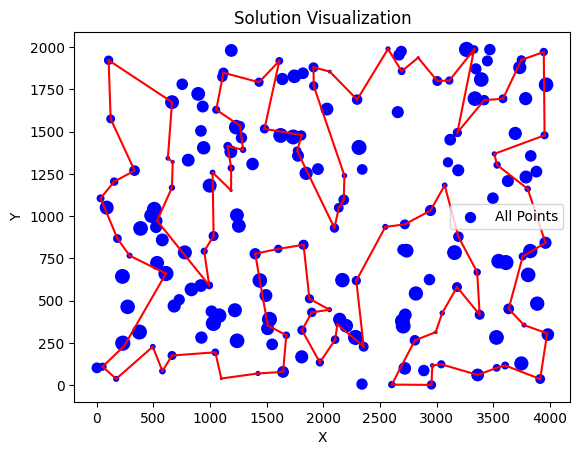

Min score for two_regret, edge, steepest: 48654
Max score for two_regret, edge, steepest: 50682
Avg score for two_regret, edge, steepest: 49818.02


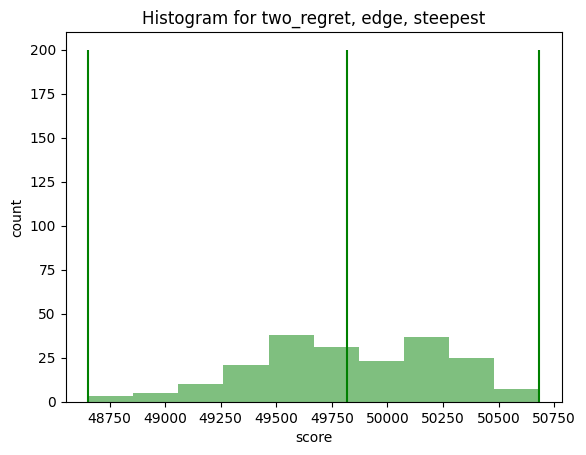

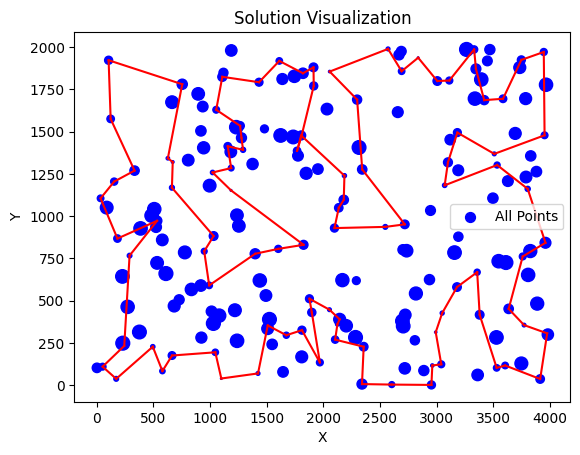

In [7]:
algos = ['random, node, greedy', 'random, node, steepest', 'random, edge, greedy', 'random, edge, steepest', 'two_regret, node, greedy', 'two_regret, node, steepest', 'two_regret, edge, greedy', 'two_regret, edge, steepest']
average_times = []
average_scores = []
count = 0
for start_method_type in start_methods:
    for intra_move in intra_moves:
        for search_type in search_types:
            start = time.perf_counter()
            final_solutions = analyze(start_method_type, intra_move, search_type, distances)
            end = time.perf_counter()
            time_passed = end - start
            avg_time = time_passed / 200
            average_times.append(avg_time)
            scores = [solution[1] for solution in final_solutions]
            average_scores.append(mean(scores))
            visualize_stats(scores, algos[count])
            count += 1
            visualize_solution(C, max(final_solutions, key=lambda solution: solution[1])[0])

# Create table with average times
Our times are really fast for python, because we are using numba. Numba is a package that compiles a function, the first time it runs it and then subsequent runs of that function are run from machine code, which makes it much faster.

In [10]:
table = PrettyTable(["Method", "Avg time for one solution", "Avg score for method"]) 
for i, algo in enumerate(algos):
    table.add_row([algo, average_times[i], average_scores[i]])
print(table)

+----------------------------+---------------------------+----------------------+
|           Method           | Avg time for one solution | Avg score for method |
+----------------------------+---------------------------+----------------------+
|    random, node, greedy    |    0.02874176300014369    |       67727.76       |
|   random, node, steepest   |    0.024887856999994254   |      65882.965       |
|    random, edge, greedy    |    0.004438671499956399   |       66723.23       |
|   random, edge, steepest   |    0.01293313100002706    |      57059.375       |
|  two_regret, node, greedy  |     0.6795723249998992    |      50253.935       |
| two_regret, node, steepest |     0.7119998490001308    |      49809.055       |
|  two_regret, edge, greedy  |     0.6552940210001543    |       50289.75       |
| two_regret, edge, steepest |     0.6555043465000927    |       49818.02       |
+----------------------------+---------------------------+----------------------+


# Conclusions
We can clearly see that scores are better for methods using weighted two regret heuristic as starting algorithm, but they are also far more time complex (around 50 times slower) and most of that time is the heuristic. So depending on what the needs are, one might use the longer methods for better score, and worse ones for faster computations. Probably we could try using a heuristic, that creates a worse solution than two regret, but runs much faster.

Our previous best scores happened for weighted two regret (average 50500 for instance C), and here we improved that average slightly to 49800. This may be due to the fact that weighted two regret creates solutions that are really close to local optima, so local search can't improve the solution much.